# Ecological models: relevant?
## NIOZ Master Thesis Project
##### Author: R. Draaijer
##### Date: March 29th 2021

In [1]:
import os

current_directory = os.getcwd()
directory = '/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding'

# Set working directory
if current_directory != directory:
    os.chdir('/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding')

### Import EBT Tool Data with NumPy
Two different datasets can be distinguished: Default Cod and Cannibalistic Cod. See paper (2008) and EBT Tutorial (2020) by Anieke van Leeuwen et al.

*Note that objects with uppercase namespaces are solely used for raw data files

In [2]:
# Get path for EBT data (.txt file)
path = r'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/EBT/EBT Data/Modified Default Cod/Modified Default.out'

# Check first entries of data
with open(path) as Default_Cod:
    print(Default_Cod.readline())

In [3]:
# Convert dataset to ndarray
import numpy as np

with open(path) as Default_Cod:
    default_cod = np.loadtxt(Default_Cod)

# Check (dimensions of) array
print(default_cod) 
print(default_cod.shape)           # Must be identical to ('Maximum integration time' + 1, OUTPUT_VAR_NR + 1) in EBT tool
print(default_cod.dtype)           # Should be float64

[[0.00000000e+00 0.00000000e+00 5.48212970e+01 ... 3.07874116e-01
  9.83841000e+00 0.00000000e+00]
 [1.00000000e+00 2.73972600e-03 5.48213227e+01 ... 3.07874682e-01
  9.83841208e+00 0.00000000e+00]
 [2.00000000e+00 5.47945210e-03 5.48213485e+01 ... 3.07875243e-01
  9.83841413e+00 0.00000000e+00]
 ...
 [3.64980000e+04 9.99945205e+01 6.25598481e+00 ... 2.24811300e-08
  6.26818600e-07 0.00000000e+00]
 [3.64990000e+04 9.99972603e+01 6.25598481e+00 ... 2.24691700e-08
  6.26477700e-07 0.00000000e+00]
 [3.65000000e+04 1.00000000e+02 6.25598481e+00 ... 2.24572100e-08
  6.26137000e-07 0.00000000e+00]]
(36501, 24)
float64


In hindsight the library pandas can be highly useful for loading data, therefore:

### Import EBT Tool Data with pandas
Two different datasets can be distinguished: Default Cod and Cannibalistic Cod. See paper (2008) and EBT Tutorial (2020) by Anieke van Leeuwen et al.

*Note that objects with uppercase namespaces are solely used for raw data files*

In [4]:
import pandas as pd

# Get path for EBT data (.txt file)
path = r'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/EBT/EBT Data/Modified Default Cod/Modified Default.out'

# Define column names (see EBT .c file in output variables section) for multilevel indexing
variables = ['Time', 'Years', 'RS', 'RJ', 'RA', 'SJ', 'SA', 'SB', 'CJ', 'CA', 'CB', 'Fc', 'ΔCJ with Fc', 'ΔCS with Fc',
             'ΔCA with Fc', 'ΔC with Fc', 'ΔSB', 'ΔSJ', 'ΔSA', 'ΔCB', 'ΔCJ', 'ΔCA', 'ΣC', 'Fs']
units = ['[day]', '[year]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]', '[g V-1]',
         '[g V-1]', '[-]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]',
         '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1 year-1]', '[g V-1]', '[-]']

with open(path) as Default_Cod:
    default_cod = pd.read_csv(Default_Cod, delimiter = '\t', header=None)

# Set column names and index
#columns = pd.MultiIndex.set_codes([[variables, units]], names = ['Output variable', 'Unit'])
default_cod.columns = variables
#default_cod.columns = columns
default_cod = default_cod.set_index('Time')

# Check (dimensions of) array
print(default_cod.shape)           # Must be identical to ('Maximum integration time' + 1, OUTPUT_VAR_NR + 1) in EBT tool

default_cod.head()

(36501, 23)


,Years,RS,RJ,RA,SJ,SA,SB,CJ,CA,CB,...,ΔCA with Fc,ΔC with Fc,ΔSB,ΔSJ,ΔSA,ΔCB,ΔCJ,ΔCA,ΣC,Fs
Time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,0.842293,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,0.842294,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,0.842295,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,0.842297,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,0.842298,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0


<IPython.core.display.Javascript object>


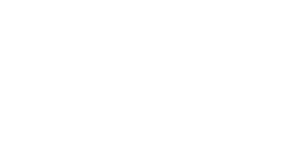

Text(0.5, 0, 'Time [year]')

In [5]:
# Visualize default_cod as is visualized by the EBT tool
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Make figure to visualize plots in
fig, axes = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(hspace=0)

# Select the biomass columns
# Cod biomass
cod_fig = fig.add_subplot(axes[0])
cod_fig.plot(default_cod['Years'], default_cod[['CJ','CA','CB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))


# Sprat biomass
sprat_fig = fig.add_subplot(axes[1])
sprat_fig.plot(default_cod['Years'], default_cod[['SJ','SA','SB']])

cod_fig.set_xticks(np.arange(0,110,20))
cod_fig.set_yticks(np.arange(0,12,2))
sprat_fig.set_xlabel('Time [year]')

## TCDF Demo with Demo Data from EBT Tool

#### Author: R. Draaijer


In [6]:
import numpy as np
import pandas as pd

# Load data from EBT tool into DataFrame
path = r'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/EBT/EBT Data/Modified Default Cod/Modified Default.out'
ebt = pd.read_csv(path, delimiter = '\t', header = None)

# Show first 10 rows of dataset
ebt.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.000000,54.821297,0.268207,0.989287,8.511213,9.955314,50.033894,8.186889,0.809228,...,0.0,0.0,56.602835,22.673092,25.988747,0.830739,0.149208,0.307874,9.838410,0.0
1,1.0,0.002740,54.821323,0.268207,0.989287,8.511207,9.955310,50.033881,8.186888,0.809230,...,0.0,0.0,56.602823,22.673058,25.988736,0.830741,0.149204,0.307875,9.838412,0.0
2,2.0,0.005479,54.821349,0.268207,0.989287,8.511201,9.955306,50.033867,8.186887,0.809231,...,0.0,0.0,56.602811,22.673023,25.988726,0.830742,0.149200,0.307875,9.838414,0.0
3,3.0,0.008219,54.821374,0.268207,0.989287,8.511194,9.955302,50.033854,8.186887,0.809233,...,0.0,0.0,56.602799,22.672989,25.988715,0.830743,0.149195,0.307876,9.838416,0.0
4,4.0,0.010959,54.821401,0.268207,0.989287,8.511188,9.955297,50.033840,8.186886,0.809235,...,0.0,0.0,56.602787,22.672955,25.988704,0.830744,0.149191,0.307876,9.838418,0.0
5,5.0,0.013699,54.821427,0.268207,0.989287,8.511182,9.955293,50.033827,8.186885,0.809236,...,0.0,0.0,56.602775,22.672921,25.988692,0.830745,0.149187,0.307877,9.838420,0.0
6,6.0,0.016438,54.821453,0.268207,0.989287,8.511175,9.955289,50.033813,8.186884,0.809238,...,0.0,0.0,56.602763,22.672887,25.988681,0.830747,0.149183,0.307877,9.838422,0.0
7,7.0,0.019178,54.821479,0.268207,0.989287,8.511169,9.955284,50.033799,8.186883,0.809240,...,0.0,0.0,56.602751,22.672853,25.988669,0.830748,0.149179,0.307878,9.838424,0.0
8,8.0,0.021918,54.821506,0.268206,0.989287,8.511163,9.955279,50.033786,8.186882,0.809241,...,0.0,0.0,56.602739,22.672819,25.988657,0.830749,0.149175,0.307879,9.838426,0.0
9,9.0,0.024658,54.821533,0.268206,0.989287,8.511157,9.955275,50.033772,8.186881,0.809243,...,0.0,0.0,56.602727,22.672785,25.988645,0.830750,0.149171,0.307879,9.838428,0.0


In [7]:
# Rename columns (see file /Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/Explanation Output Parameters.docx)
labels = ['Time (day)', 'Time (year)',                    # Time labels
          'Rs', 'Rj', 'Ra',                               # Shared resources biomass
          'Sj', 'Sa', 'Sb',                               # Sprat stages biomass
          'Cj', 'Ca', 'Cb',                               # Cod stages biomass
          'Fc',                                           # Fishing imposed on cod
          'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc', # Changes in cod biomass when fishing present
          'ΔSb', 'ΔSj', 'ΔSa',                           # Changes in sprat biomass
          'ΔCb', 'ΔCj', 'ΔCa',                           # Changes in cod biomass
          'ΣC',                                           # Sum of cod biomass
          'Fs']                                           # Fishing imposed on sprat
ebt.columns = labels

# Show new column labels
print(ebt.columns)

Index(['Time (day)', 'Time (year)', 'Rs', 'Rj', 'Ra', 'Sj', 'Sa', 'Sb', 'Cj',
       'Ca', 'Cb', 'Fc', 'ΔCj + Fc', 'ΔCa + Fc', 'ΔCb + Fc', 'ΔC + Fc', 'ΔSb',
       'ΔSj', 'ΔSa', 'ΔCb', 'ΔCj', 'ΔCa', 'ΣC', 'Fs'],
      dtype='object')


<IPython.core.display.Javascript object>


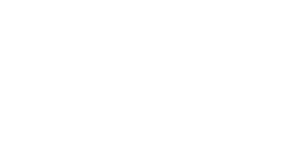

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.lines as lines

# Select data to be visualized
cod = ebt[['Cj', 'Ca', 'Cb']]
sprat = ebt[['Sj', 'Sa', 'Sb']]
time = ebt['Time (year)']

# Set subplot figure defaults
fig, [cod_plt, sprat_plt] = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace = 0)
fig.suptitle('Cod-sprat dynamics')

# Set labels for shared x-axis and individual y-axes
cod_plt.set(ylabel = 'Cod biomass ($\mathregular{g^V}$)')
sprat_plt.set(ylabel = 'Sprat biomass ($\mathregular{g^V}$)')
plt.xlabel('Time (years)')

# Visualize data
cod_plt.plot(time, cod)
sprat_plt.plot(time, sprat)

# Add legends
cod_plt.legend(['Cj', 'Ca', 'Cb'], loc = 'center right')
sprat_plt.legend(['Sj', 'Sa', 'Sb'], loc = 'center right')

# Draw vertical line at 20 years and 30 years to visualize data selection
cod_plt.plot([20] * 10, np.arange(0,10), '--k')
sprat_plt.plot([20] * 150, np.arange(0,150), '--k')

cod_plt.plot([30] * 10, np.arange(0,10), '--k')
sprat_plt.plot([30] * 150, np.arange(0,150), '--k')

In the above figure dashed lines represent the data I have selected to carry out a demo of the TCDF machine learning model. For the purpose of this demo I have aditionally selected a low resolution of 30 day timesteps over 100 years. Next I will clean the data for this demo purpose too, with the following characteristics:
> - Data between year 20 and 30 (i.e. 120 datapoints) 
> - Inclusion of the columns representing sprat- and cod stages
> - Inclusion of the shared resources columns

The data needs to be converted into a .csv file with every column representative of a (continuous) timeseries and the header needs explanatory column names (for eventually we will create a temporal causal graph with each node representing a timeseries).

In [9]:
# Select information of datapoints between year 20 and 30
demo_ebt = ebt[(ebt['Time (year)'] >= 20) & (ebt['Time (year)'] <= 30)]

# Select only the necessary biomass columns as timeseries
demo_ebt = demo_ebt[['Rs', 'Rj', 'Ra',
                     'Sj', 'Sa', 'Sb',
                     'Cj', 'Ca', 'Cb',
                     'Fc']]

# Reset index
demo_ebt.reset_index(inplace = True)
demo_ebt.drop('index', axis = 'columns', inplace = True)

# Show first and last five columns of clean dataframe
demo_ebt.head(-5)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809400,0.843533,0.000000
1,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843532,0.001027
2,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184919,0.809399,0.843530,0.002055
3,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184918,0.809398,0.843527,0.003082
4,54.838332,0.268238,0.989280,8.510205,9.956561,50.013244,8.184917,0.809396,0.843522,0.004110
...,...,...,...,...,...,...,...,...,...,...
3641,25.940005,0.290546,0.969713,11.992235,20.165629,69.478724,8.987906,3.973822,0.076795,3.740753
3642,25.957505,0.290461,0.969712,11.986605,20.150119,69.483323,8.989210,3.972971,0.076769,3.741781
3643,25.975086,0.290377,0.969711,11.980978,20.134557,69.487854,8.990512,3.972101,0.076743,3.742808
3644,25.992747,0.290292,0.969711,11.975354,20.118942,69.492318,8.991813,3.971212,0.076716,3.743836


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data with min-max normalization
scaler = MinMaxScaler()
ebt_scaled = scaler.fit_transform(demo_ebt)

# Write scaled data to DataFrame
labels = ['Rs', 'Rj', 'Ra',
          'Sj', 'Sa', 'Sb',
          'Cj', 'Ca', 'Cb',
          'Fc']
demo_ebt_scaled = pd.DataFrame(ebt_scaled, columns = labels)

# Check the scaled DataFrame
demo_ebt_scaled.head(-10)

,Rs,Rj,Ra,Sj,Sa,Sb,Cj,Ca,Cb,Fc
0,1.000000,0.165474,0.984412,0.000000e+00,0.000190,0.000000e+00,0.011218,0.002431,1.000000,0.000000
1,1.000000,0.165474,0.984412,3.460767e-10,0.000190,1.384297e-10,0.011218,0.002431,0.999999,0.000274
2,1.000000,0.165474,0.984412,3.655434e-09,0.000190,1.697049e-09,0.011217,0.002431,0.999996,0.000548
3,1.000000,0.165474,0.984412,1.286972e-08,0.000190,6.111426e-09,0.011216,0.002430,0.999992,0.000822
4,1.000000,0.165474,0.984413,3.110363e-08,0.000190,1.480175e-08,0.011215,0.002430,0.999986,0.001096
...,...,...,...,...,...,...,...,...,...,...
3636,0.043359,0.622474,0.000372,7.592537e-01,0.882482,9.967713e-01,0.977885,0.995656,0.022334,0.996164
3637,0.043923,0.620770,0.000308,7.580328e-01,0.881175,9.970244e-01,0.979474,0.995420,0.022304,0.996438
3638,0.044489,0.619066,0.000250,7.568126e-01,0.879863,9.972741e-01,0.981062,0.995177,0.022273,0.996712
3639,0.045059,0.617363,0.000198,7.555930e-01,0.878546,9.975202e-01,0.982649,0.994929,0.022242,0.996986


In [11]:
# Write clean dataframe demo_ebt to a new .csv file
demo_ebt_scaled.to_csv(r'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/TCDF/data/EBT_demo_dataset.csv', index = False)

For implementation of the first machine model (i.e. TCDF) we have to create a reference to the 'groundtruth' of the model. This makes it possible to compare the found relations by the model to the true relations we have defined in the dataset.

The groundtruth file needs to be .csv file, have no heading and contains three columns. The first column consists of the index of the cause (corresponds to the columnnumber in the EBT_demo_dataset.csv file), index of effect (idem dito), and time delay between index and cause.

For the corresponding causes and effects see the paper by A. van Leeuwen et al. (2008).

In [12]:
# Create list of lists for the rows to the groundtruth.csv file
groundtruth_rows = [[9, 7, 0],  # Fc - Ca
                    [9, 8, 0],  # Fc - Cb
                    [6, 1, 0],  # Cj - Rj
                    [6, 3, 0],  # Cj - Sj
                    [7, 3, 0],  # Ca - Sj
                    [7, 4, 0],  # Ca - Sa
                    [7, 5, 0],  # Ca - Sb
                    [8, 3, 0],  # Cb - Sj
                    [8, 4, 0],  # Cb - Sa
                    [8, 5, 0],  # Cb - Sb
                    [8, 2, 0],  # Cb - Ra
                    [3, 0, 0],  # Sj - Rs
                    [4, 0, 0],  # Sa - Rs
                    [5, 0, 0]]  # Sb - Rs

# Convert list into DataFrame
groundtruth = pd.DataFrame(groundtruth_rows)

# Write DataFrame to .csv
groundtruth.to_csv(r'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/TCDF/data/EBT_demo_groundtruth.csv', index = False, header = False)


Performing the TCDF requires a different directory (where the TCDF is located). Check if the current directory is set at `'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/TCDF'`.

In [13]:
# Define needed directory
directory = '/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/TCDF'

# Check current working directory
current_directory = os.getcwd()

# Change working directory to perform TCDF
if current_directory != directory:
    os.chdir('/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/TCDF')

# Check new current working directory
os.getcwd()

'/Users/apple/Desktop/MSc Thesis 1/MSc Thesis/Coding/TCDF'

This part shows the functionality of TCDF.

See the corresponding paper for more detail: ["Causal Discovery with Attention-Based Convolutional Neural Networks"](https://www.mdpi.com/2504-4990/1/1/19).

In [14]:
# Show all argument options

%run -i "runTCDF.py" --help

usage: runTCDF.py [-h] [--cuda] [--epochs EPOCHS] [--kernel_size KERNEL_SIZE]
                  [--hidden_layers HIDDEN_LAYERS]
                  [--learning_rate LEARNING_RATE] [--optimizer {Adam,RMSprop}]
                  [--log_interval LOG_INTERVAL] [--seed SEED]
                  [--dilation_coefficient DILATION_COEFFICIENT]
                  [--significance SIGNIFICANCE] [--plot]
                  (--ground_truth GROUND_TRUTH | --data DATA [DATA ...])

TCDF: Temporal Causal Discovery Framework

optional arguments:
  -h, --help            show this help message and exit
  --cuda                Use CUDA (GPU) (default: False)
  --epochs EPOCHS       Number of epochs (default: 1000)
  --kernel_size KERNEL_SIZE
                        Size of kernel, i.e. window size. Maximum delay to be
                        found is kernel size - 1. Recommended to be equal to
                        dilation coeffient (default: 4)
  --hidden_layers HIDDEN_LAYERS
                        Number of

In [18]:
%matplotlib inline

# Run TCDF with the selected demo dataset of EBT data

%run -i "runTCDF.py" --data data/EBT_demo_dataset.csv --learning_rate 0.1 --hidden_layers 5 --epochs 1000 --significance 0.5

Arguments: Namespace(cuda=False, data=['data/EBT_demo_dataset.csv'], dilation_coefficient=4, epochs=1000, ground_truth=None, hidden_layers=5, kernel_size=4, learning_rate=0.1, log_interval=500, optimizer='Adam', plot=False, seed=1111, significance=0.5)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
Epoch:  1 [0%] 	Loss: 0.156182
Epoch: 500 [50%] 	Loss: 0.000629
Epoch: 1000 [100%] 	Loss: 0.000109
Potential causes:  [3, 5, 4, 7]
Validated causes:  []

 Analysis started for target:  Rj
Epoch:  1 [0%] 	Loss: 0.069092
Epoch: 500 [50%] 	Loss: 0.000328
Epoch: 1000 [100%] 	Loss: 0.000134
Potential causes:  [7, 3]
Validated causes:  [7]

 Analysis started for target:  Ra
Epoch:  1 [0%] 	Loss: 0.152611
Epoch: 500 [50%] 	Loss: 0.000429
Epoch: 1000 [100%] 	Loss: 0.000227
Potential causes:  [4, 1]
Validated causes:  []

 Analysis started for target:  Sj
Epoch:  1 [0%] 	Loss: 0.094518
Epoch: 500 [50%] 	Loss: 0.000528
Epoch: 1000 [100%] 	Loss: 0.000139
Potential causes:  [3, 7]
V

Arguments: Namespace(cuda=False, data=None, dilation_coefficient=4, epochs=500, ground_truth={'data/EBT_demo_dataset.csv': 'data/EBT_demo_groundtruth.csv'}, hidden_layers=0, kernel_size=4, learning_rate=0.01, log_interval=250, optimizer='Adam', plot=True, seed=1111, significance=0.8)

 Dataset:  EBT_demo_dataset.csv

 Analysis started for target:  Rs
Epoch:  1 [0%] 	Loss: 0.846189
Epoch: 250 [50%] 	Loss: 0.000425
Epoch: 500 [100%] 	Loss: 0.000326
Potential causes:  [0, 5]
Validated causes:  []

 Analysis started for target:  Rj
Epoch:  1 [0%] 	Loss: 0.358392
Epoch: 250 [50%] 	Loss: 0.005141
Epoch: 500 [100%] 	Loss: 0.003825
Potential causes:  [3, 4]
Validated causes:  [3]

 Analysis started for target:  Ra
Epoch:  1 [0%] 	Loss: 0.836093
Epoch: 250 [50%] 	Loss: 0.007768
Epoch: 500 [100%] 	Loss: 0.001112
Potential causes:  [6, 5, 0]
Validated causes:  []

 Analysis started for target:  Sj
Epoch:  1 [0%] 	Loss: 0.317497
Epoch: 250 [50%] 	Loss: 0.000851
Epoch: 500 [100%] 	Loss: 0.000134
Po

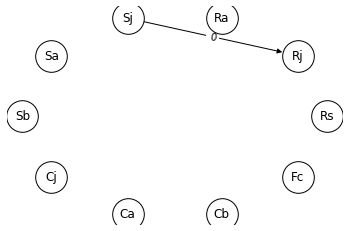

<Figure size 432x288 with 0 Axes>

In [16]:
%matplotlib inline

# Run TCDF and evaluate by comparing the results to the ground truth

%run -i "runTCDF.py" --ground_truth data/EBT_demo_dataset.csv=data/EBT_demo_groundtruth.csv  --epochs 500 --log_interval 250 --plot